In [50]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.4.1


In [1]:
# Load in the data 
from sklearn.datasets import load_breast_cancer

# load the data (assigned 'ddata' for my sanity)
# using ddata to distinguish from the key data
ddata = load_breast_cancer()

type(ddata)
ddata.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
ddata.data.shape 
# the data has 569 samples and 30 features

(569, 30)

In [4]:
ddata.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
ddata.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
ddata.target.shape

(569,)

In [7]:
ddata.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(ddata.data, ddata.target, test_size = 0.33)

N, D = X_train.shape
                                                

In [10]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1.1342 - accuracy: 0.2645 - val_loss: 1.0924 - val_accuracy: 0.2553
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0022 - accuracy: 0.2798 - val_loss: 0.9864 - val_accuracy: 0.3191
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9120 - accuracy: 0.3191 - val_loss: 0.8897 - val_accuracy: 0.3670
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8209 - accuracy: 0.4086 - val_loss: 0.8034 - val_accuracy: 0.4628
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.4647 - val_loss: 0.7279 - val_accuracy: 0.5532
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5249 - val_loss: 0.6627 - val_accuracy: 0.6489
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6118 - val_loss: 0.6086 - val_accuracy: 0.7074
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9649 - val_loss: 0.1648 - val_accuracy: 0.9574
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9675 - val_loss: 0.1633 - val_accuracy: 0.9574
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1404 - accuracy: 0.9489 - val_loss: 0.1619 - val_accuracy: 0.9574
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9786 - val_loss: 0.1605 - val_accuracy: 0.9574
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9791 - val_loss: 0.1590 - val_accuracy: 0.9628
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1218 - accuracy: 0.9711 - val_loss: 0.1577 - val_accuracy: 0.9628
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9803 - val_loss: 0.1565 - val_accuracy: 0.9628
Epoch 

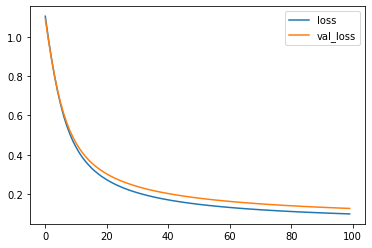

In [12]:
# Plot the fit results
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

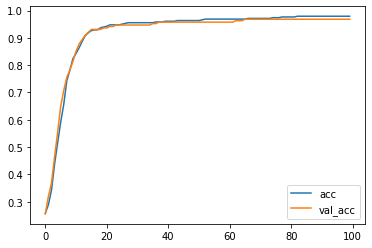

In [13]:
# Plot accuracy
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

## Making Predictions

In [28]:
# Make predictons
P = model.predict(X_test)
print(P) # outputs of the sigmoid, interpreted as proberbilities P(y=1|x)

[[9.92695391e-01]
 [4.10299629e-01]
 [1.87987089e-03]
 [9.81102705e-01]
 [1.75861299e-01]
 [9.32006598e-01]
 [9.80520010e-01]
 [8.96484613e-01]
 [6.69658184e-04]
 [1.03670985e-01]
 [9.61907983e-01]
 [1.98667347e-02]
 [9.64498639e-01]
 [9.95066822e-01]
 [7.85588741e-01]
 [9.89495873e-01]
 [6.75693691e-01]
 [8.24248433e-01]
 [5.93006611e-04]
 [1.46508604e-01]
 [4.04124260e-02]
 [9.03285503e-01]
 [6.36459947e-01]
 [9.76990104e-01]
 [9.91167307e-01]
 [9.90796924e-01]
 [8.15480113e-01]
 [1.18809938e-03]
 [9.70906079e-01]
 [2.09957361e-04]
 [1.05288625e-03]
 [2.91991830e-02]
 [8.27662468e-01]
 [2.15381384e-04]
 [9.68213022e-01]
 [1.69008970e-04]
 [9.98093426e-01]
 [9.98187065e-01]
 [1.88669562e-03]
 [9.91380811e-01]
 [4.09077883e-01]
 [7.42986798e-03]
 [9.53193843e-01]
 [9.96469259e-01]
 [9.69994187e-01]
 [6.52494192e-01]
 [9.10742879e-01]
 [9.90160763e-01]
 [2.89928913e-03]
 [3.04717720e-02]
 [9.59434211e-01]
 [9.27501321e-01]
 [9.63337660e-01]
 [9.93737280e-01]
 [8.74386191e-01]
 [5.148142

In [43]:
# Flatten to get (N,) to match targets (right now predictions are (N,1))
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [48]:
# calculate the accuaracy compare it to the evaluate
print("manually calculated accuracy: ", np.mean(P == y_test), 4)
print("Evaluate output: ", model.evaluate(X_test, y_test))

manually calculated accuracy:  0.9680851063829787 4
6/6 [==============================] - 0s 778us/step - loss: 0.1261 - accuracy: 0.9681
Evaluate output:  [0.12609216570854187, 0.9680851101875305]


In [49]:
# Saving and loading the model
model.save("linearclassifier.h5")

# Check that the file exists
!ls -lh

total 1.4M
-rw-rw-r-- 1 bg bg  19K Apr 29 15:03  linearclassifier.h5
-rw-rw-r-- 1 bg bg 2.3K Apr  6 16:20  moore.csv
-rw-rw-r-- 1 bg bg 492K Aug  2  2019  spam.csv
-rw-rw-r-- 1 bg bg  72K Apr 13 15:03 'TF2.0 ANN MNIST.ipynb'
-rw-rw-r-- 1 bg bg 456K Apr 13 19:25 'TF2.0 ANN Regression.ipynb'
-rw-rw-r-- 1 bg bg 4.2K Apr 15 22:16 'TF2.0 Basic Computations.ipynb'
-rw-rw-r-- 1 bg bg  99K Apr 14 11:59 'TF2.0 CNN for CIFAR.ipynb'
-rw-rw-r-- 1 bg bg  85K Apr 13 19:57 'TF2.0 CNN for Fashion MNIST.ipynb'
-rw-rw-r-- 1 bg bg  62K Apr 29 15:03 'TF2.0 Linear Classification.ipynb'
-rw-rw-r-- 1 bg bg  60K Apr  6 16:47 'TF2.0 Linear Regression.ipynb'
-rw-rw-r-- 1 bg bg  58K Apr 14 17:09 'TF2.0 Spam Detection RNN.ipynb'
-rw-rw-r-- 1 bg bg 5.2K Apr 14 13:19 'TF2.0 Text Preprocessing.ipynb'


In [20]:
# Load the model and test it
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 633us/step - loss: 0.0989 - accuracy: 0.9681


[0.09886528551578522, 0.9680851101875305]